# Regression Analysis

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import glm, ols
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn.metrics import r2_score
# from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
# Creates the features
regress_data = pd.read_csv(open("all_features.csv", 'rU'), encoding='utf-8', engine='c')
regress_data = regress_data.drop('Unnamed: 0', 1)
regress_data = regress_data.drop('Unnamed: 0.1', 1)
regress_data = regress_data.drop('Avg_Tweets', 1)
regress_data = regress_data.drop('is_Series_C', 1)
regress_data = regress_data.drop('is_Series_D', 1)
regress_data = regress_data.drop('is_Series_B', 1)
regress_data = regress_data.drop('is_Series_A', 1)
regress_data['Series'] = [val[1:] for val in list(regress_data['Series'])]
regress_data['i_Series_A'] = 1 * (regress_data.Series == 'Series_A')
regress_data['i_Series_B'] = 1 * (regress_data.Series == 'Series_B')
regress_data['i_Series_C'] = 1 * (regress_data.Series == 'Series_C')
regress_data['i_Series_D'] = 1 * (regress_data.Series == 'Series_D')
regress_data = regress_data.replace([np.inf, -np.inf], 0)
regress_data.fillna(0, inplace=True)

# Break it into test and train
itrain, itest = train_test_split(range(regress_data.shape[0]), train_size=0.9)
mask=np.ones(regress_data.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask=(mask==1)
regress_train = regress_data[mask]
regress_test = regress_data[~mask]

# Break it into series A, series B, series C, series D
regress_test_A = regress_test[regress_test['Series'] == 'Series_A']
regress_train_A = regress_train[regress_train['Series'] == 'Series_A']
regress_test_B = regress_test[regress_test['Series'] == 'Series_B']
regress_train_B = regress_train[regress_train['Series'] == 'Series_B']
regress_test_C = regress_test[regress_test['Series'] == 'Series_C']
regress_train_C = regress_train[regress_train['Series'] == 'Series_C']
regress_test_D = regress_test[regress_test['Series'] == 'Series_D']
regress_train_D = regress_train[regress_train['Series'] == 'Series_D']

regress_train.head()

C:\Users\anush\AppData\Local\Temp\ipykernel_2028\2431395099.py:2: DeprecationWarning: 'U' mode is deprecated
  regress_data = pd.read_csv(open("all_features.csv", 'rU'), encoding='utf-8', engine='c')
C:\Users\anush\AppData\Local\Temp\ipykernel_2028\2431395099.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  regress_data = regress_data.drop('Unnamed: 0', 1)
C:\Users\anush\AppData\Local\Temp\ipykernel_2028\2431395099.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  regress_data = regress_data.drop('Unnamed: 0.1', 1)
C:\Users\anush\AppData\Local\Temp\ipykernel_2028\2431395099.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  regress_data = regress_data.drop('Avg_Tweets', 1)
C:\Users\anush\AppData\Local\Temp\ipykernel_2028

,company_name,Series,Total_Likes,Total_Retweets,Series_Amount,Market,tweet_count,get_dayrange,get_dayiqr,likes_mean,...,is_Mobile,is_Web Hosting,mean_neg,mean_pos,total_neg,total_pos,i_Series_A,i_Series_B,i_Series_C,i_Series_D
0,1stdibs,Series_C,230,134,15000000,Semiconductors,213,13,7,1.863850,...,False,False,0.038290,0.068850,0.010989,0.082418,0,0,1,0
1,2tor,Series_C,10,32,32500000,0,162,98,42,0.061728,...,False,False,0.018364,0.042564,0.000000,0.060606,0,0,1,0
2,365Scores,Series_B,15,23,5500000,Apps,163,1,1,0.092025,...,False,False,0.019701,0.046836,0.006329,0.006329,0,1,0,0
3,36Kr,Series_C,58,21,20000,Startups,173,83,43,1.312139,...,False,False,0.036364,0.058589,0.051546,0.077320,0,0,1,0
4,6fusion,Series_B,2,28,7000000,Hardware + Software,177,251,131,0.011299,...,False,False,0.021415,0.037837,0.000000,0.000000,0,1,0,0


In [3]:
# Create stats for each of the funding rounds
def find_stats(funding, label):
    print('------------------------------------')
    print('Round: ' + label)
    amounts = funding['Series_Amount']
    print('Mean ' + str(np.mean(amounts)))
    print('StDev ' + str(np.std(amounts)))
    
    
# Helps visualize the log of the funding rounds
def create_log_plot(regress_train_A, regress_train_B, regress_train_C, regress_train_D):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
    fig.tight_layout()
    round_title = ['Series A Funding Amounts', 'Series B Funding Amounts', 'Series C Funding Amounts', 'Series D Funding Amounts']
    rounds = [regress_train_A, regress_train_B, regress_train_C, regress_train_D]
    for ax, i in zip(axes.ravel(), range(len(rounds))):
        funding = np.log((list(rounds[i]['Series_Amount'])))
        ax.hist(funding, color='green', alpha=0.2)
        ax.set_title(round_title[i])

# Visualizes the residuals of the funding rounds
def plot_residuals(errors):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(7,7))
    fig.tight_layout()
    axes.hist(errors, color='green', alpha=0.2)
    axes.set_title('Residual Analysis')

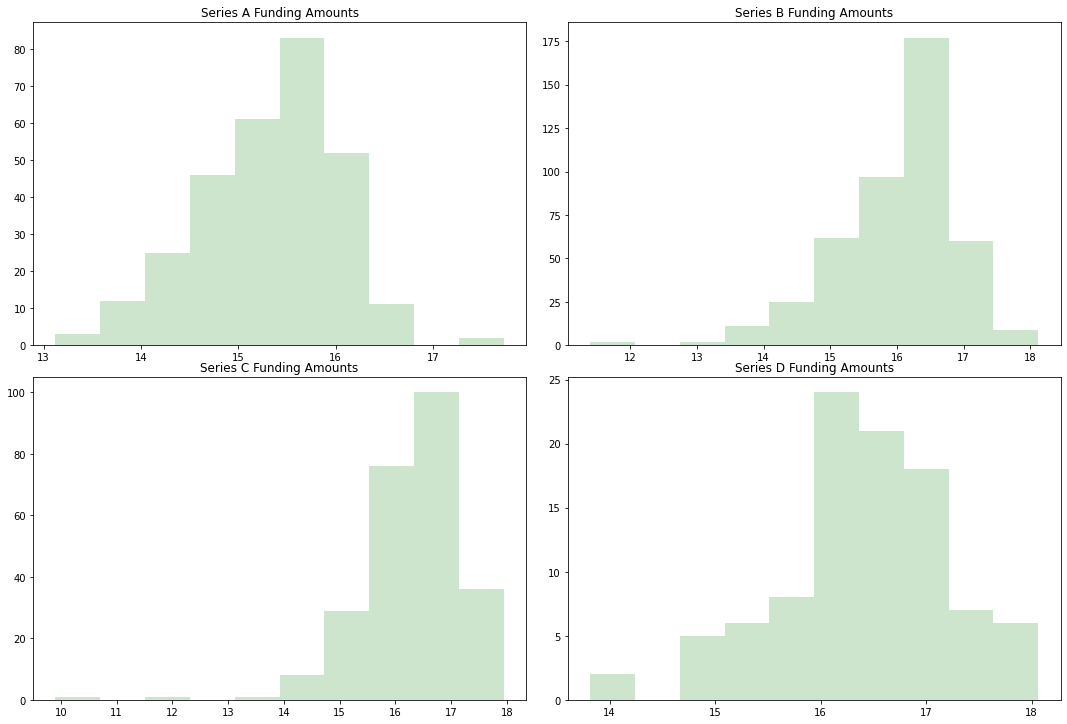

In [4]:
 create_log_plot(regress_train_A, regress_train_B, regress_train_C, regress_train_D)

In [5]:
features = list(regress_train_D.columns[2:])
features.remove('Market')
features.remove('Series_Amount')

X_train = np.asmatrix(regress_train[features].astype(np.float64))
X_test = np.asmatrix(regress_test[features].astype(np.float64))
y_train = np.asmatrix(regress_train['Series_Amount'].apply(lambda val: np.log(val))).T
y_test = np.asmatrix(regress_test['Series_Amount'].apply(lambda val: np.log(val))).T

# Ridge Regression

In [6]:
vdict = {}
rdict = {}
kf = KFold()
for a in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    for cv_train, cv_test in kf.split(y_train):
        lin_model_r = Ridge(alpha=a)
        lin_model_r.fit(X_train[cv_train], y_train[cv_train])
        y_pred = np.asmatrix(lin_model_r.predict(X_train[cv_test])).T
        mse = (mean_squared_error(y_train[cv_test], y_pred.T)**(0.5))
        vdict[a] = mse
        rdict[a] = lin_model_r
        
best_a = min(vdict, key=vdict.get)
best_ridge_model =rdict[best_a]

print('Cross validation MSE values: ' + str(vdict))
print('Best a from cross validation: ' + str(best_a))

Cross validation MSE values: {0.001: 0.8891906040347952, 0.01: 0.8865266370430339, 0.1: 0.8799500193183036, 1: 0.8737832538263409, 10: 0.8671033284439249, 100: 0.8727066911012007, 1000: 0.924567580745715, 10000: 0.9482381326348929}
Best a from cross validation: 10


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/re

In [7]:
y_pred = np.asmatrix(best_ridge_model.predict(X_test)).T
mse = (mean_squared_error(y_test, y_pred.T)**(0.5))
baseline_mean = np.log(np.asmatrix(np.mean(regress_test['Series_Amount']) * np.ones(y_test.shape[0]))).T

print('RMSE for Ridge Regression: ' + str(mse))
print('Baseline by predicting averages RMSE: ' + str(mean_squared_error(y_test, baseline_mean)**(0.5)))

RMSE for Ridge Regression: 0.7422462013088398
Baseline by predicting averages RMSE: 0.9271505124890628


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/re

c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


R Squared Score: 0.25208885159066474


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


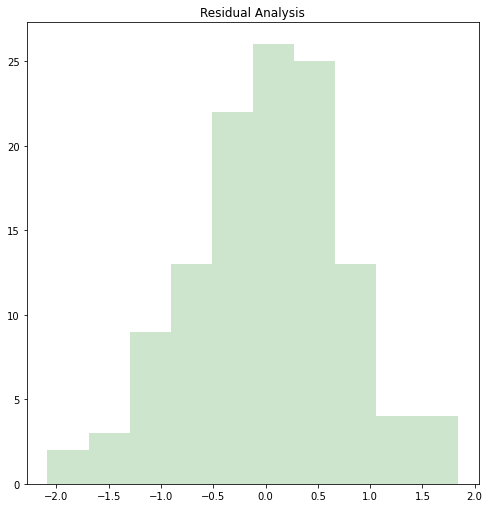

In [8]:
plot_residuals(y_test-y_pred.T)
print('R Squared Score: ' + str(r2_score(y_test, y_pred.T)))

# Lasso Regression

In [9]:
vdict = {}
rdict = {}
kf = KFold()
for a in [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
    for cv_train, cv_test in kf.split(y_train):
        lin_model_r = Lasso(alpha=a)
        lin_model_r.fit(X_train[cv_train], y_train[cv_train])
        y_pred = np.asmatrix(lin_model_r.predict(X_train[cv_test])).T
        mse = (mean_squared_error(y_train[cv_test], y_pred)**(0.5))
        vdict[a] = mse
        rdict[a] = lin_model_r
        
best_a = min(vdict, key=vdict.get)
best_lasso_model =rdict[best_a]

print('Cross validation MSE values: ' + str(vdict))
print('Best a from cross validation: ' + str(best_a))

Cross validation MSE values: {0.001: 0.8674257771742189, 0.01: 0.8636991801893178, 0.1: 0.9042048653927536, 1: 0.9441378894936836, 10: 0.9528090402775391, 100: 0.9597173638048716, 1000: 0.9597173638048716, 10000: 0.9597173638048716}
Best a from cross validation: 0.01


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/re

In [10]:
y_pred = np.asmatrix(best_lasso_model.predict(X_test)).T
mse = (mean_squared_error(y_test, y_pred)**(0.5))
baseline_mean = np.log(np.asmatrix(np.mean(regress_test['Series_Amount']) * np.ones(y_test.shape[0]))).T

print('RMSE for Lasso Regression: ' + str(mse))
print('Baseline by predicting averages RMSE: ' + str(mean_squared_error(y_test, baseline_mean)**(0.5)))

RMSE for Lasso Regression: 0.7513940832696682
Baseline by predicting averages RMSE: 0.9271505124890628


c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/re

c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
c:\users\anush\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


R Squared Score: 0.23353984694221852


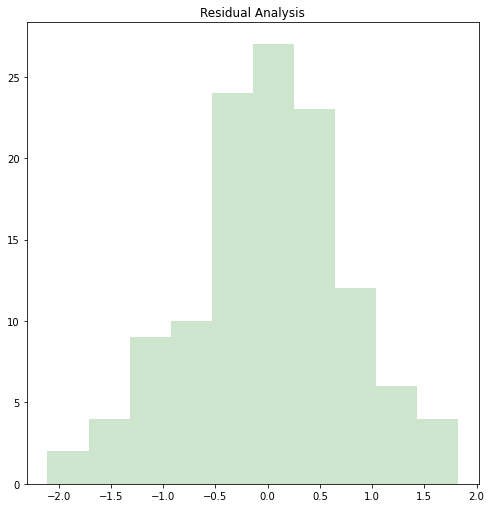

In [11]:
plot_residuals(y_test-y_pred)
print('R Squared Score: ' + str(r2_score(y_test, y_pred)))